In [60]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt

In [62]:
with open('data.txt', 'r') as f:
      data = f.readlines()

for i in range(len(data)):
    data[i] = data[i].lower().replace('\n', '')

stop_words = ['the', 'is', 'will', 'be', 'a', 'only', 'can', 'their', 'now', 'and', 'at', 'it']

filterd_data = []
for sent in data:
    temp = []
    for word in sent.split():
        if word not in stop_words:
            temp.append(word)
        filterd_data.append(temp)

bigrams = []
for word_list in filterd_data:
    for i in range(len(word_list) - 1):
        for j in range(i + 1, len(word_list)):
            bigrams.append([word_list[i], word_list[j]])
            bigrams.append([word_list[j], word_list[i]])

all_words = []

for bi in bigrams:
    all_words.extend(bi)

all_words = list(set(all_words))
all_words.sort()

print(all_words)
print(f'Total num of words are: {len(all_words)}')

word_dict = {}

counter = 0
for word in all_words:
    word_dict[word] = counter
    counter += 1

onehot_data = np.zeros((len(all_words), len(all_words)))
for i in range(len(all_words)):
    onehot_data[i][i] = 1

onehot_dict = {}
counter = 0
for word in all_words:
    onehot_dict[word] = onehot_data[counter]
    counter += 1

X = []
Y = []

for bi in bigrams:
    X.append(onehot_dict[bi[0]])
    Y.append(onehot_dict[bi[1]])

X = np.array(X)
Y = np.array(Y)

['beautiful', 'boy', 'daughter', 'future', 'king', 'man', 'prince', 'princess', 'queen', 'son', 'strong', 'woman']
Total num of words are: 12


In [73]:
embending_size = 2

model = Sequential([
    Dense(embending_size, activation = 'linear'),
    Dense(Y.shape[1], activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

model.fit(X, Y, epochs = 1000, batch_size = 256, verbose = False)

In [74]:
weights = model.get_weights()[0]

word_embending = {}
for word in all_words:
    word_embending[word] = weights[word_dict[word]]

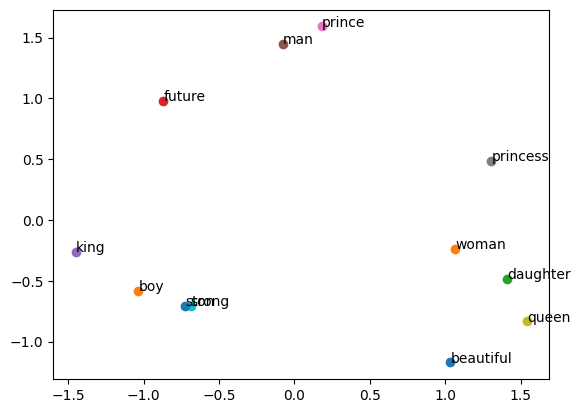

In [75]:
for word in list(word_dict.keys()):
    coord = word_embending.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))

plt.show()